In [15]:
import matplotlib.pyplot as plt
import numpy as np

import librosa

from librosa import display

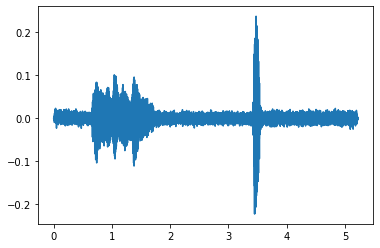

In [10]:
data, samplerate = librosa.load("inputaudio.wav")

time = len(data) / samplerate
plt.plot(np.linspace(0,time,len(data)), data)
plt.show()

# mel filter
定義我家的 mel filter 長怎樣

In [43]:
filter_band = librosa.filters.mel(n_fft=2048,sr=samplerate,n_mels=6)
filter_band.shape

(6, 1025)

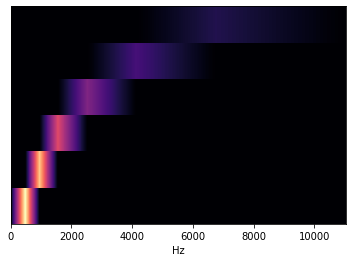

In [44]:
plt.figure()
librosa.display.specshow(filter_band,sr=samplerate,x_axis="linear")
plt.show()

In [35]:
mel_spectrogram = librosa.feature.melspectrogram(data,sr=samplerate,n_fft=2048, hop_length=1024,n_mels=3)

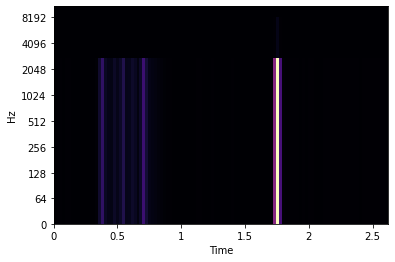

In [42]:
plt.figure()
librosa.display.specshow(mel_spectrogram,sr=samplerate,x_axis="time",y_axis="log")
plt.show()